In [9]:
import numpy as np
def hilbert(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = 1/(i+j+1) #debido a la correccion de rangos sumamos 1 a i y 1 a j entonces obtenemos i+j+1
    return A

In [10]:
def Gauss_Seidel(A, b, x_0, tol=1e-10, m_iter=500):
    x = x_0.astype(float).copy()
    k = 0
    norm_x = []
    norm_r = []
    while np.linalg.norm(b - A @ x) > tol and k < m_iter: #criterio de residuos y de cantidad maxima de iteraciones   
        for i in range(len(A)):
            suma1 = 0
            suma2 = 0
            for j in range(0, i):
                suma1 += A[i, j] * x[j]  
            for j in range(i + 1, len(A)):
                suma2 += A[i, j] * x[j] 
            x[i] = (b[i] - suma1 - suma2) / A[i, i]
        k += 1
        norm_x.append(np.linalg.norm(x))
        norm_r.append(np.linalg.norm(b - A@x))
    return x, norm_x, norm_r

In [11]:
A = hilbert(100)
b = np.ones(100)
x0 = np.zeros_like(b)
x, norm_x, norm_r = Gauss_Seidel(A,b,x0,1e-10)

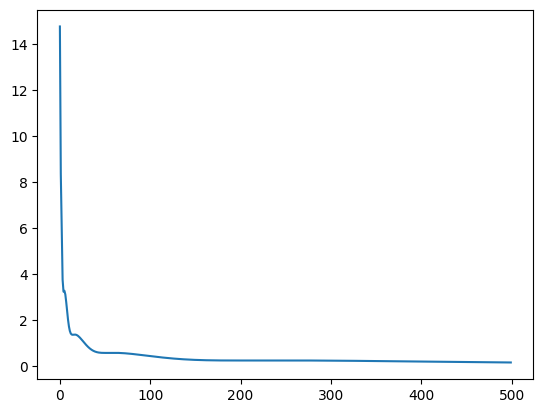

In [12]:
import matplotlib.pyplot as plt
a = np.arange(0, 500, 1)
plt.plot(a, norm_r)
plt.show()

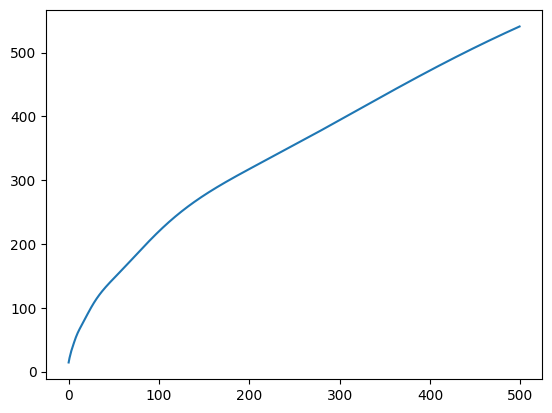

In [ ]:
a = np.arange(0, 500, 1)
plt.plot(a, norm_x)
plt.show()

Para el método de Gauss Seidel la matriz de Hilbert a pesar de cumplir son ser Simétrica Definida Positiva la convergencia es muy lenta y a la vez un poco zigzageante, esto debido al mal condicionamiento de la matriz, por lo cual a pesar de cumplir las condiciones para ser convergente su convergencia será muy lenta.

In [14]:
def  metodo_potencia(A, q, iter=100):
    for k in range(iter):
        z = A@q
        q = z / np.linalg.norm(z)
        nu = q.T @ A @ q
    return nu, q 

In [ ]:
def potencia_inversa(A, z0, mu, tol=1e-10, m_iter=500): #con mu igual a 0 tenemos el valor propio mas bajo
    n = np.max(A.shape)
    M = A-mu@np.eye(n)
    q = z0 / np.linalg.norm(z0)
    error = []
    sigma = []
    res = tol +1 
    num_iter = 0
    while(res >= tol and num_iter <= m_iter):
        num_iter += 1
        z = np.linalg.solve(M, q)
        q = z / np.linalg.norm(z)
        z = A @ q
        lambda1 = q.T @ z #debido a la palabra reservada lambda 
        w = np.linalg.solve(M, q)
        q2 = w /np.linalg.norm(w)
        cos = np.abs(q2.T@q)
        if cos > 1e-2:
            res = np.linalg.norm(z-lambda1*q)
            error.append(res)
            sigma.append(lambda1)
        else: 
            print('Valor propio multiple')
    x = q
    return sigma, x, num_iter, error 

El numero de condición es:[2.21778648e+12 1.60246322e+13]


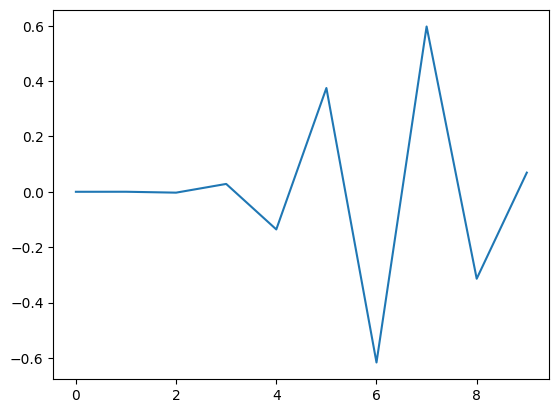

El numero de condición es:[2.80001341e+17 1.71030715e+18]


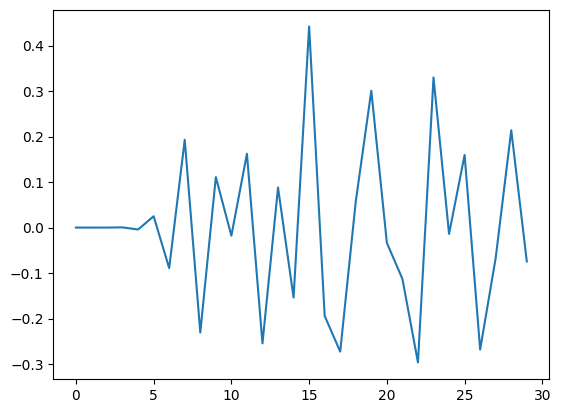

El numero de condición es:[6.64069220e+16 1.13763388e+18]


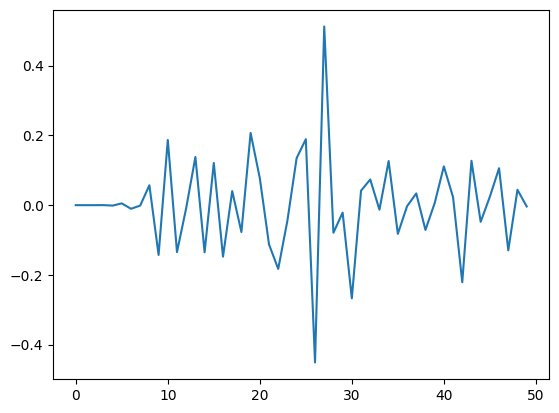

El numero de condición es:[5.79473521e+17 6.12471898e+17]


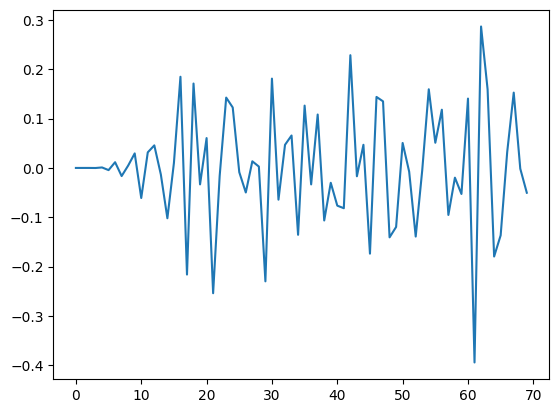

In [34]:
experimentos = [10, 30, 50, 70]
for i in experimentos:
    A = hilbert(i)
    nu, q = metodo_potencia(A,np.ones(i))
    sigma, x, num_iter, error = potencia_inversa(A ,np.ones(i), np.zeros(i), 1e-10 ,500)
    cond = nu/sigma
    print(f"El numero de condición es:{cond}")
    a = np.arange(0, len(x), 1)
    plt.plot(a, x)
    plt.show()

Como se puede apreciar el vector propio va iterando demasiado entre cada caso por lo cual este método se vuelve inestable por el número de condición tan alto siendo matrices relativamente pequeñas. La condición de la matriz afecta tanto a la estabilidad numérica como velocidad de convergencia y pasos innecesarios como esos zigzag